In [1]:
## Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import sklearn as sk
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
## Loading in main dataset
## Low memory set to false in order to load whole dataset

wildfires_2020 = 'wildfire_to_2020.csv'
wildfires_2020 = pd.read_csv(wildfires_2020, low_memory = False)

In [3]:
## Drop all data prior to 2000

wildfires_2020_new = ((wildfires_2020[wildfires_2020["FIRE_YEAR"] >1999]))
wildfires_2020_new

,X,Y,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
0,-121.005820,40.036939,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,...,1730.0,0.10,A,40.036944,-121.005833,USFS,CA,63,6063.0,Plumas County
1,-120.404431,38.933050,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,1530.0,0.25,A,38.933056,-120.404444,USFS,CA,61,6061.0,Placer County
2,-120.735542,38.984161,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,2024.0,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,6017.0,El Dorado County
3,-119.913320,38.559161,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,1400.0,0.10,A,38.559167,-119.913333,USFS,CA,3,6003.0,Alpine County
4,-119.933043,38.559161,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,...,1200.0,0.10,A,38.559167,-119.933056,USFS,CA,3,6003.0,Alpine County
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303561,-108.959489,39.037884,2303562,400732978,ICS209_2020_11710294,INTERAGCY,IA-ICS209,BLM,USCOGRD,Grand Junction Field Office,...,NaN,1.00,B,39.037890,-108.959500,MISSING/NOT SPECIFIED,CO,NaN,NaN,NaN
2303562,-119.503043,37.148606,2303563,400732979,ICS209_2020_11781527,INTERAGCY,IA-ICS209,ST/C&L,USCAMMU,Merced-Mariposa Unit,...,NaN,100.00,D,37.148611,-119.503056,Private,CA,Madera,6039.0,Madera County
2303563,-114.442787,46.151364,2303564,400732980,ICS209_2020_11815219,INTERAGCY,IA-ICS209,FS,USMTBRF,Bitterroot National Forest,...,NaN,50.00,C,46.151370,-114.442800,MISSING/NOT SPECIFIED,MT,NaN,NaN,NaN
2303564,-120.114486,46.670334,2303565,400732982,ICS209_2020_11831809,INTERAGCY,IA-ICS209,FWS,USWAMCR,Mid Columbia National Wildlife Refuge Complex,...,1900.0,24892.00,G,46.670340,-120.114500,UNDEFINED FEDERAL,WA,Yakima,53077.0,Yakima County


In [4]:
## Drop all data not from CO and convert to a new CSV for easier access

wildfires_2020_co = wildfires_2020_new[wildfires_2020_new['STATE'].str.contains('CO')]
wildfires_2020_co

wildfires_2020_co.to_csv('wildfires_2020_CO.csv', index=False)
wildfires_2020_co


,X,Y,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,...,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME
47,-105.183045,39.292216,48,48,FS-1418940,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,...,1530.0,0.5,B,39.292222,-105.183056,USFS,CO,NaN,NaN,NaN
61,-105.983601,38.913327,62,62,FS-1418976,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,...,1218.0,0.2,A,38.913333,-105.983611,USFS,CO,NaN,NaN,NaN
62,-106.367490,39.100272,63,63,FS-1418978,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,...,1506.0,0.1,A,39.100278,-106.367500,USFS,CO,NaN,NaN,NaN
114,-102.805824,37.344994,115,117,FS-1419150,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,...,2130.0,80.0,C,37.345000,-102.805833,USFS,CO,NaN,NaN,NaN
205,-105.431934,38.891105,206,209,FS-1419344,FED,FS-FIRESTAT,FS,USCOPSF,Pike and San Isabel National Forest,...,1736.0,2.5,B,38.891111,-105.431944,STATE OR PRIVATE,CO,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303521,-107.692189,40.533934,2303522,400732909,ICS209_2019_10688953,INTERAGCY,IA-ICS209,ST/C&L,USCOMFX,Moffat County,...,NaN,303.0,E,40.533940,-107.692200,MISSING/NOT SPECIFIED,CO,Moffat,8081.0,Moffat County
2303539,-102.411991,38.103744,2303539,400732946,ICS209_2019_10751700,INTERAGCY,IA-ICS209,ST/C&L,USCOPWX,Prowers County,...,NaN,4521.0,F,38.103750,-102.412000,MISSING/NOT SPECIFIED,CO,Prowers,8099.0,Prowers County
2303544,-104.854690,38.464744,2303545,400732954,ICS209_2019_10764513,INTERAGCY,IA-ICS209,DOD,USCOFCQ,Fort Carson Army Base,...,NaN,30.0,C,38.464750,-104.854700,MISSING/NOT SPECIFIED,CO,Pueblo,8101.0,Pueblo County
2303546,-107.601389,38.112216,2303547,400732956,ICS209_2019_10768134,INTERAGCY,IA-ICS209,FS,USCOGMF,"Grand Mesa, Uncompahgre and Gunnison National ...",...,NaN,859.0,E,38.112222,-107.601400,USFS,CO,Ouray,8091.0,Ouray County


In [5]:
# size = wildfires_2020_co['FIRE_SIZE']
# time = wildfires_2020_co['FIRE_YEAR']

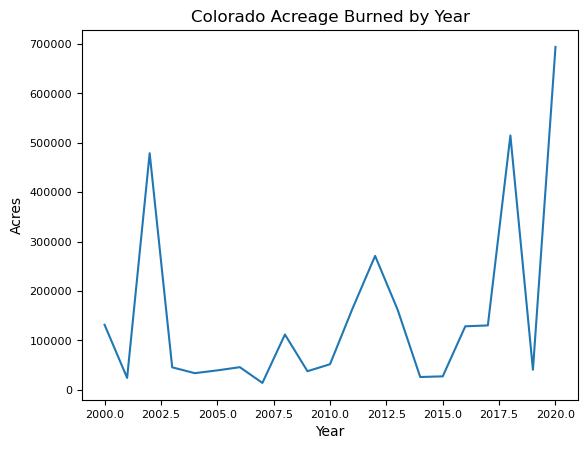

In [6]:
## Load in new csv and sum up fire size(acres burned) by year as a new data frame 'df_sum'
## Plot the data

wildfires_CO = pd.read_csv('wildfires_2020_CO.csv')
df_sum = wildfires_CO.groupby('FIRE_YEAR')['FIRE_SIZE'].sum()

plt.title('Colorado Acreage Burned by Year')
plt.xlabel('Year')
plt.ylabel('Acres')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.plot(df_sum.index, df_sum.values)

plt.show()


In [7]:
## Create a new data frame 'df_count' that is the amount of fires per year
## apply a linear regression line from sklearn

df_count = wildfires_CO.groupby('FIRE_YEAR')['FIRE_YEAR'].count()
df_count
x = np.arange(2000,2021)
x = x.reshape(-1,1)
arr = np.array(df_count.values)
lr = LinearRegression().fit(x,arr)
df_count

FIRE_YEAR
2000    1618
2001    1267
2002    1222
2003    2421
2004    1310
2005    1875
2006    1316
2007    1070
2008    1015
2009     952
2010    2694
2011    7232
2012    1106
2013    3894
2014    3202
2015    3088
2016    4628
2017    5696
2018    5373
2019    3005
2020    4400
Name: FIRE_YEAR, dtype: int64

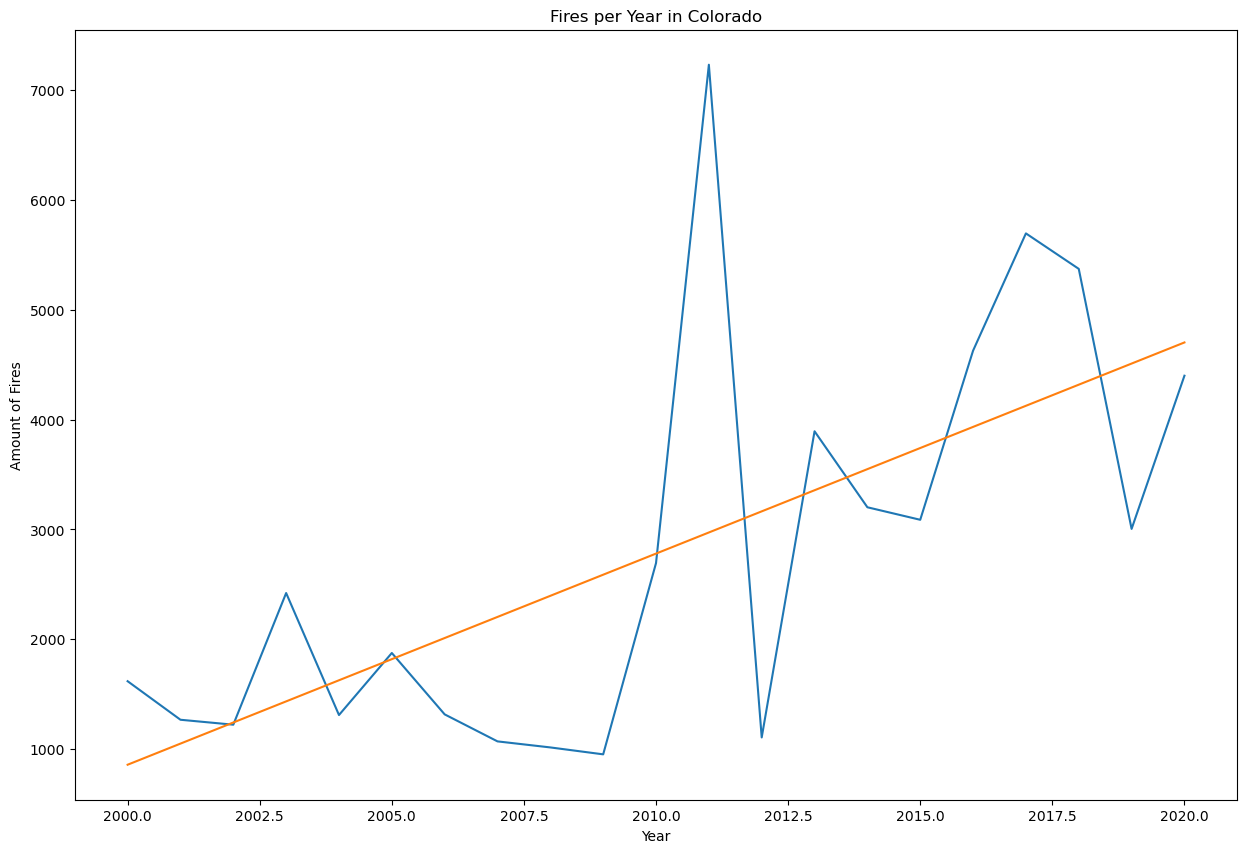

In [8]:
## Plot 'df_count'

plt.figure(figsize = (15,10))
plt.title('Fires per Year in Colorado')
plt.xlabel('Year')
plt.ylabel('Amount of Fires')
plt.plot(df_count)
plt.plot(x,lr.predict(x))

## Notes and Observations 

Wildifres in Colorado have, on average, increased in severity and frequency over the past two decades. Later in our project we were will link these with an increase in droguht severity in Colorado over the past two decades. More research would need to be done to determine a root cause for these events. Major peaks, relative to previous and upcoming years, can be seen for both acreage burned and fires per year in 2002, 2011/12, 2017/18. 

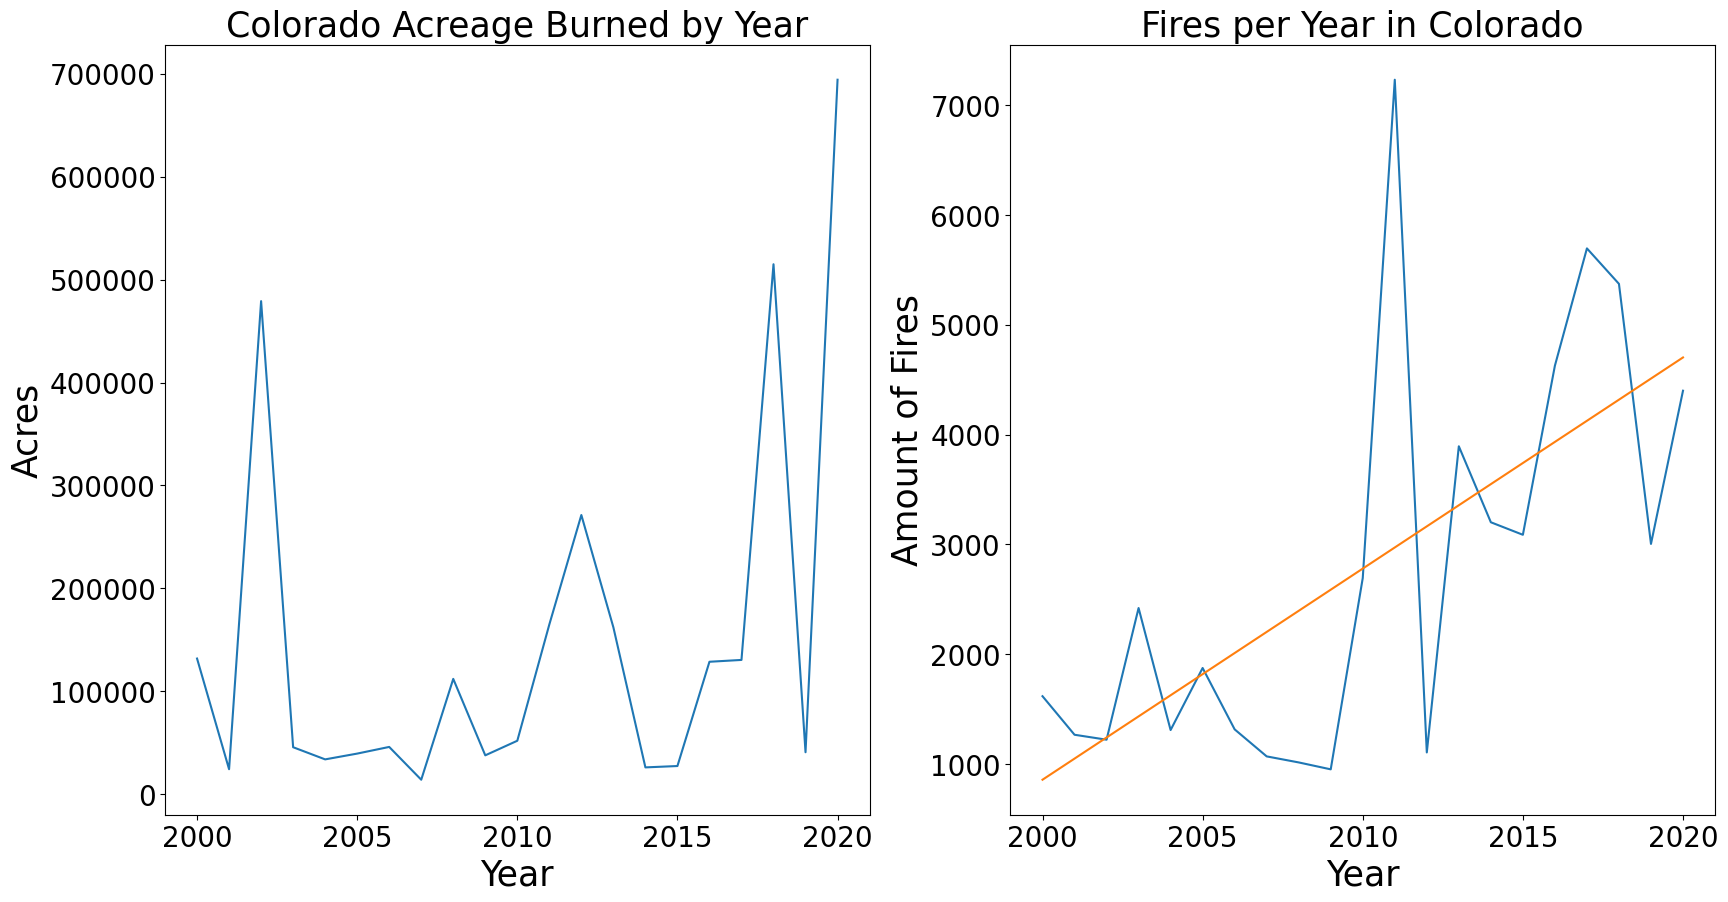

In [9]:
## Combine the to graphs onto one plot side by side

CO_sub, axes = plt.subplots(1,2, figsize = (20,10))
[ax1,ax2] = axes.flatten()

ax1.set_title('Colorado Acreage Burned by Year', fontsize = 25)
ax1.set_xlabel('Year', fontsize = 25)
ax1.set_ylabel('Acres', fontsize = 25)
ax1.plot(df_sum.index, df_sum.values,)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax2.set_title('Fires per Year in Colorado', fontsize = 25)
ax2.set_xlabel('Year', fontsize = 25)
ax2.set_ylabel('Amount of Fires', fontsize = 25)
ax2.plot(df_count)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.plot(x,lr.predict(x))

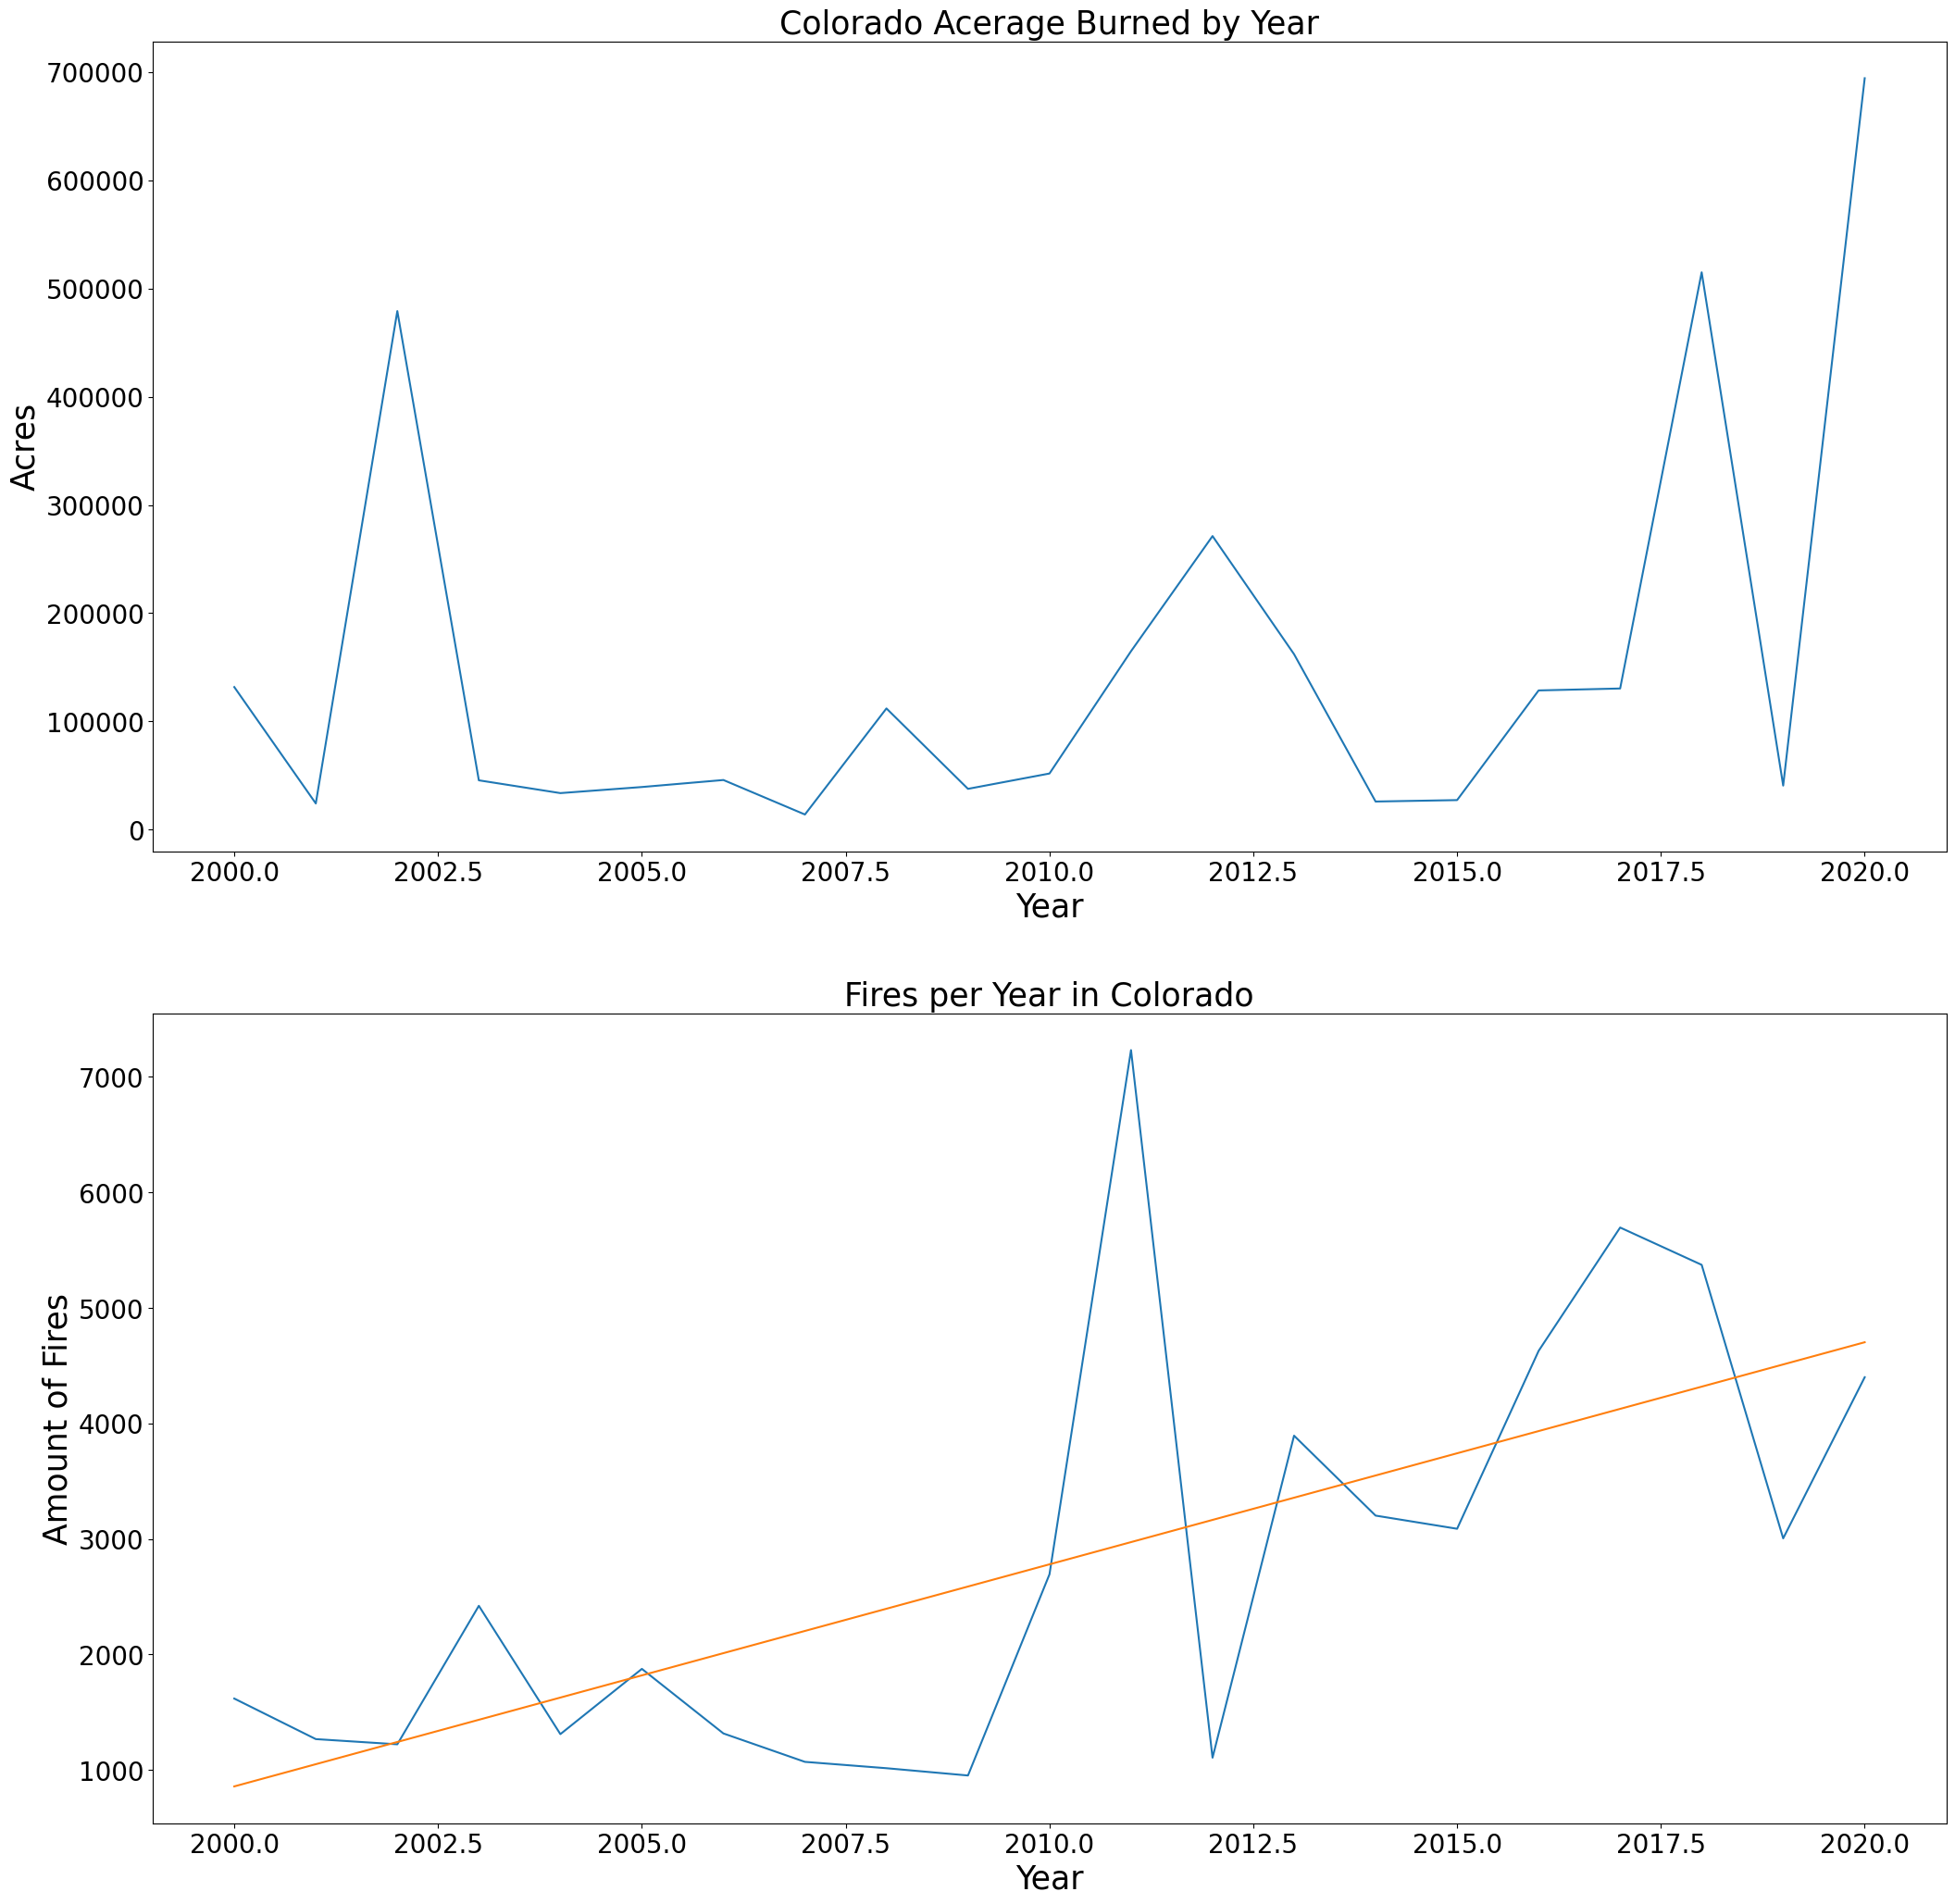

In [12]:
## Combine the to graphs onto one with 'df_sum' on top

CO_sub, axes = plt.subplots(2,1, figsize = (25,25))
[ax1,ax2] = axes.flatten()

ax1.set_title('Colorado Acerage Burned by Year', fontsize = 25)
ax1.set_xlabel('Year', fontsize = 25)
ax1.set_ylabel('Acres', fontsize = 25)
ax1.plot(df_sum.index, df_sum.values)
ax1.tick_params(axis='both', which='major', labelsize=20)

ax2.set_title('Fires per Year in Colorado', fontsize = 25)
ax2.set_xlabel('Year', fontsize = 25)
ax2.set_ylabel('Amount of Fires', fontsize = 25)
ax2.plot(df_count)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax2.plot(x,lr.predict(x))

plt.savefig("../FP04-groundwater/Colorado_Fires_and_Acreage_Burned_per_Year")